In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sb
sb.set(style = 'ticks')

In [2]:
# Defining Parameters
Q_0 = 500/60*10**(-6)*10**(-3) #m3/s, 500ul/min
R_0 = 5e10 #Pa.s/m3
R_1 = 4e11 #Pa.s/m3
P_th_open_rel = 10.83*10**3 #Pa
P_th_close_rel = 4.26*10**3 #Pa
v_0 = 2.5e-11 #m3
C_valve = 1.173e-15
AL = 6e-5 #m3
P_atm = 101325 #Pa
Q_M = 8.197e-12 #m3/s
P_th_open_abs = P_th_open_rel + P_atm
P_th_close_abs = P_th_close_rel + P_atm

In [3]:
def charge(z, t):
    x, y = z
    T1 = (x*Q_0)/(AL-Q_0*t) - (x*x - y*y)/(2*R_0*(AL-Q_0*t))
    T2 = ((x*x-y*y)/(2*R_0) - Q_M*y)*1/(v_0 + C_valve*(2*y - P_th_close_abs))
    return [T1, T2]

In [4]:
def discharge(z, t):
    x, y = z
    T1 = (x*Q_0)/(AL-Q_0*t) - (x*x - y*y)/(2*R_0*(AL-Q_0*t))
    T2 = ((x*x - y*y)/(2*R_0) - (y*y - P_atm**2)/(2*R_1))*(1/(v_0 + C_valve*(2*y-P_th_open_abs)))
    return [T1, T2]

In [5]:
time_period_charge = []
time_period_discharge = []
n = 10000001
loc = '/Users/vishwavasani/GaTech Dropbox/Vishwa Vasani/Vishwa@GATech/Air Oscillator/Final Paper/reviewer comments/Updated Plots'

In [6]:
p = [[215/256, 48/256, 39/256], [171/256, 217/256, 233/256]]
m = ['>', 'D']

In [7]:
z0 = [101325 + 4.27*10**3, 101325 + 4.27*10**3]
t = np.linspace(0, 3000, n)
sol = odeint(charge, z0, t)
index = np.min(np.where(sol[:,1]>101325 + 10.83*10**3))
time_period_charge.append(t[index])
z0 = [101325 + 10.83*10**3, 101325 + 10.83*10**3]
t1 = np.linspace(0, 5000, n)
sol1 = odeint(discharge, z0, t1)
index1 = np.max(np.where(sol1[:,1] > 101325 + 4.27*10**3))
time_period_charge.append(t1[index1])
new_start = [sol1[index1,0], sol1[index1,1]]
(np.array(new_start)-101325)/1000

array([4.79167039, 4.27000091])

In [8]:
z0 = [101325 + 4.271*10**3, 101325 + 4.27*10**3]
#z0 = new_start
t = np.linspace(0, 3000, n)
sol = odeint(charge, z0, t)
index = np.min(np.where(sol[:,1]>101325 + 10.83*10**3))
new_restart = [sol[index, 0], sol[index, 1]]
time_period_charge.append(t[index])
z1 = new_restart
t1 = np.linspace(0, 3000, n)
sol1 = odeint(discharge, z1, t1)
index1 = np.max(np.where(sol1[:,1] > 101325 + 4.27*10**3))
time_period_charge.append(t1[index1])

Text(0.5, 0, 'Time (min)')

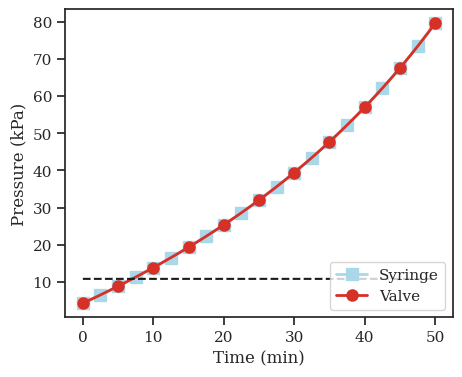

In [9]:
plt.rc('font', family = 'serif')
fig, ax = plt.subplots(figsize = (5, 4))

plt.plot(t/60, (sol[:,0]-101325)/1000, color = p[1], marker = 's', markersize = 8, markevery = int(n/20), linewidth = 2, label = 'Syringe')
plt.plot(t/60, (sol[:,1]-101325)/1000, color = p[0], marker = 'o', markersize = 8, markevery = int(n/10), linewidth = 2, label = 'Valve')
plt.legend(loc = 4)

plt.plot(t/60, 10.83*np.linspace(1,1,n), 'k--')

plt.ylabel('Pressure (kPa)', size = 12)
plt.xlabel('Time (min)', size = 12)
#plt.savefig(loc + 'full_pressurization.svg',dpi=400)

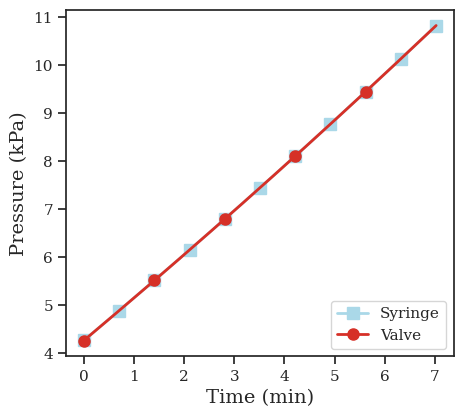

In [10]:
plt.rc('font', family = 'serif')
fig, ax = plt.subplots(figsize = (5, 4.5))

t_press = t[:index]
plt.plot(t_press/60, (sol[:index, 0]-101325)/1000, color = p[1], marker = 's', markevery = int(index/10),  markersize = 8, linewidth = 2.0, label = 'Syringe')
plt.plot(t_press/60, (sol[:index, 1]-101325)/1000, color = p[0], marker = 'o', markevery = int(index/5), markersize = 8, linewidth = 2.0, label = 'Valve')

#plt.plot(t_press, 10.83*np.linspace(1,1,index), 'k--')

plt.ylabel('Pressure (kPa)', size = 14)
plt.xlabel('Time (min)', size = 14)
plt.legend(loc = 4)
#plt.text(0.05, 0.9, 'B.', transform=ax.transAxes, fontweight='bold', fontsize = 15)
plt.savefig(loc + 'threshold_pressurization.svg',dpi=400)

Text(0.5, 0, 'Time (s)')

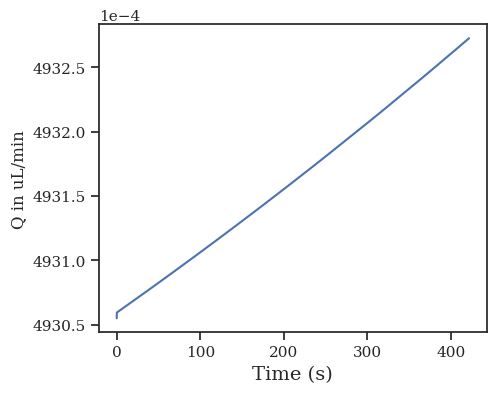

In [11]:
i_start = 5

fig, ax = plt.subplots(figsize = (5, 4))

I = (np.square(sol[i_start:index, 0]) - np.square(sol[i_start:index, 1]))/(sol[i_start:index, 1])
I = I/(2*R_0)*6e10

plt.plot(t_press[i_start:], I)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
plt.ylabel('Q in uL/min')
plt.xlabel('Time (s)', size = 14)

#plt.text(0.05, 0.9, 'B.', transform=ax.transAxes, fontweight='bold', fontsize = 15)

Text(0.5, 0, 'Time (min)')

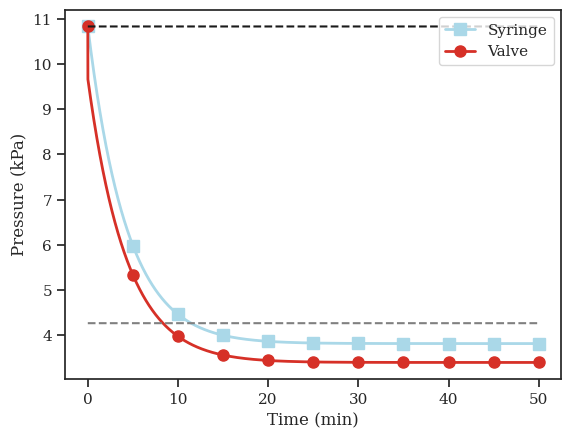

In [12]:
plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

plt.plot(t1/60, (sol1[:, 0]-101325)/1000, color = p[1], marker = 's', markevery = int(n/10), markersize = 8, linewidth = 2.0, label = 'Syringe')
plt.plot(t1/60, (sol1[:, 1]-101325)/1000, color = p[0], marker = 'o', markevery = int(n/10), markersize = 8, linewidth = 2.0, label = 'Valve')

plt.plot(t1/60, 10.83*np.linspace(1,1,n), 'k--')
plt.plot(t1/60, 4.27*np.linspace(1,1,n), color = 'gray', linestyle = 'dashed')

plt.legend(loc = 1)
plt.ylabel('Pressure (kPa)', size = 12)
plt.xlabel('Time (min)', size = 12)
#plt.savefig(loc + 'full_depressurization.svg',dpi=400)

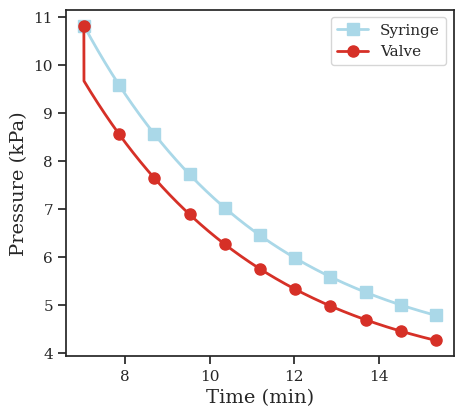

In [13]:
plt.rc('font', family = 'serif')
fig, ax = plt.subplots(figsize = (5, 4.5))

t_depress = t_press[-1] + t1[:index1]
plt.plot(t_depress/60, (sol1[:index1, 0]-101325)/1000, color = p[1], marker = 's', markevery = int(index1/10), markersize = 8, linewidth = 2.0, label = 'Syringe')
plt.plot(t_depress/60, (sol1[:index1, 1]-101325)/1000, color = p[0], marker = 'o', markevery = int(index1/10), markersize = 8, linewidth = 2.0, label = 'Valve')
#plt.plot(t_depress, 10.83*np.linspace(1,1,int(np.size(t_depress))), 'k--')
#plt.plot(t_depress, 4.27*np.linspace(1,1,int(np.size(t_depress))), color = 'gray', linestyle = 'dashed')


plt.legend(loc = 1)
plt.ylabel('Pressure (kPa)', size = 14)
plt.xlabel('Time (min)', size = 14)
#plt.text(0.08, 0.9, 'C.', transform=ax.transAxes, fontweight='bold', fontsize = 15)
plt.savefig(loc + 'threshold_depressurization.svg',dpi=400)

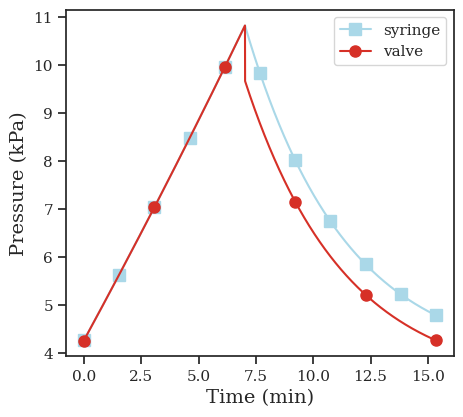

In [14]:
plt.rc('font', family = 'serif')
fig, ax = plt.subplots(figsize = (5, 4.5))

sol2_syringe = np.concatenate((sol[:index, 0] - 101325, sol1[:index1, 0] - 101325))
sol2_valve =   np.concatenate((sol[:index, 1] - 101325, sol1[:index1, 1] - 101325))
total_time = np.concatenate((t_press, t_depress))
plt.ylabel('Pressure (kPa)', size = 14)
plt.xlabel('Time (min)', size = 14)
plt.plot(total_time/60, (sol2_syringe)/1000, color = p[1], marker = 's', markersize = 8, markevery = int(total_time.shape[0]/10), label = 'syringe')
plt.plot(total_time/60, (sol2_valve)/1000, color = p[0], marker = 'o', markersize = 8, markevery = int(total_time.shape[0]/5), label = 'valve')
plt.legend(loc = 1)
#plt.text(0.05, 0.9, 'D.', transform=ax.transAxes, fontweight='bold', fontsize = 15)
plt.savefig(loc + 'full_cycle.svg',dpi=400)